In [1]:
import requests as re
import pandas as pd
from bs4 import BeautifulSoup
import re as regex


In [2]:
dict_class={}

In [3]:
dict_class["review"]="qwjRop"
dict_class["title"]="_2xg6Ul"
dict_class["user"]="_3LYOAd _3sxSiS"
dict_class["rating"]="hGSR34 E_uFuv"
dict_class["address"]="_19inI8"
dict_class["time"]="_3LYOAd"
dict_class["Main_Title"]="o9Xx3p _1_odLJ"

In [4]:
datami=pd.read_csv("data_mi.csv")

In [5]:
datami.shape

(1164, 7)

In [6]:
datami.head()

,user,title,review,Model,time_of_review,rating,user_address
0,Santosh Thapa,Worth the money,This photo is awesome and little bit value for...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,27days ago,4,"Certified Buyer, Nainital"
1,Bobita Haarika,Fabulous!,"Smooth performance ,nice camera ,value for mon...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,5months ago,5,"Certified Buyer, Dergaon"
2,Priti Ghosh,Just wow!,"its amazing phone ...value for money , superb ...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,2months ago,5,"Certified Buyer, Katwa"
3,vishnu jith,Classy product,in this amount nice Mobile camara pakka better...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,7months ago,5,"Certified Buyer, Enkakkad"
4,Pramukh Pandey,Highly recommended,i give 💯 to the looks ...its just awesome and ...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,8months ago,5,"Certified Buyer, Gorakhpur"


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

##EDA TITLE

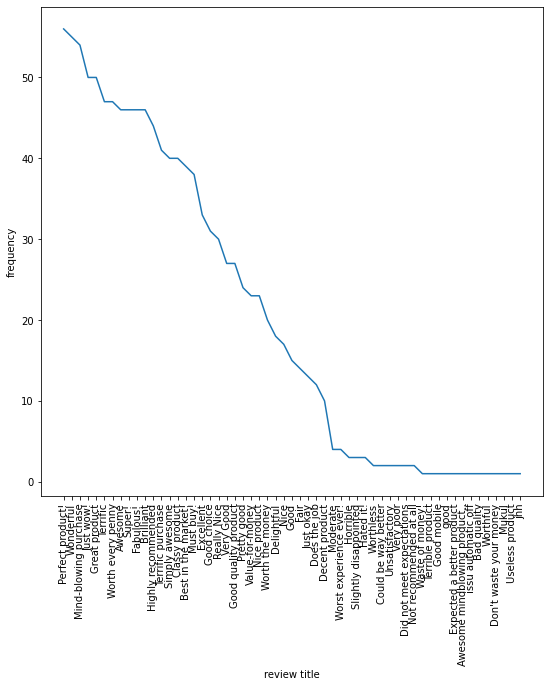

In [9]:
plt.figure(figsize=(9,9))
plt.plot(datami.title.value_counts())
plt.xlabel("review title")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

##### The following are the 15 most repetetive titles

In [10]:
datami["title"].value_counts()[:16]

Perfect product!         56
Wonderful                55
Mind-blowing purchase    54
Just wow!                50
Great product            50
Terrific                 47
Worth every penny        47
Awesome                  46
Super!                   46
Fabulous!                46
Brilliant                46
Highly recommended       44
Terrific purchase        41
Simply awesome           40
Classy product           40
Best in the market!      39
Name: title, dtype: int64

In [11]:
import wordcloud

In [12]:
listwords=[]
for each in datami["title"].values:      #removing spacesin each titleandconsidering entire titleas one word
  listwords.append("".join(each.split(" ")))
  

In [13]:
words=""
words=" ".join(listwords)               #joining all the words into an essay and feeding it into an essay 

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
stopwords=set(STOPWORDS) # getting the stopping words\
# Generating a Wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
             
                min_font_size = 10).generate(words) 

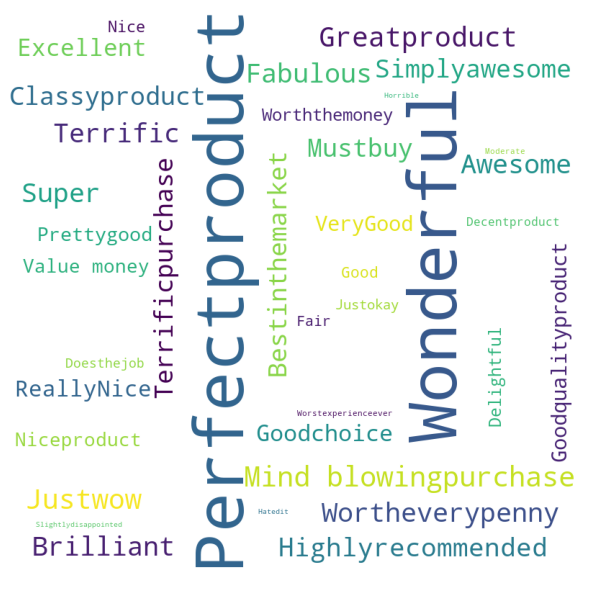

In [16]:
# Plotting the WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### From the WordCloud, it seems that most of the review titles are positive in nature

### EDA REVIEW

In [17]:
datami["review"]

0       This photo is awesome and little bit value for...
1       Smooth performance ,nice camera ,value for mon...
2       its amazing phone ...value for money , superb ...
3       in this amount nice Mobile camara pakka better...
4       i give 💯 to the looks ...its just awesome and ...
                              ...                        
1159                                           good phone
1160                                            very nice
1161    Superb phone in this price range.... Just go f...
1162    ots verry good productthats why i am buying th...
1163                                        Nice products
Name: review, Length: 1164, dtype: object

### USER RATING

In [18]:
datami["rating"].value_counts()

5    830
4    249
3     85
Name: rating, dtype: int64

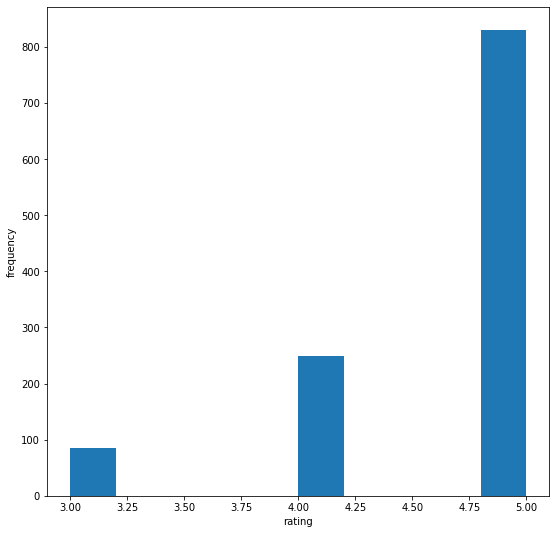

In [19]:
plt.figure(figsize=(9,9))
plt.hist(datami.rating)
plt.xlabel("rating")
plt.ylabel("frequency")
plt.show()

#### From above histogram it is evident that most of the ratings are 5/5

### USER_ADDRESS

In [20]:
datami["user_address"]=[x.replace("Certified Buyer,","").strip() for x in datami["user_address"].values.tolist()]

In [21]:
datami["user_type"]="Certified Buyer"

In [22]:
datami.head()

,user,title,review,Model,time_of_review,rating,user_address,user_type
0,Santosh Thapa,Worth the money,This photo is awesome and little bit value for...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,27days ago,4,Nainital,Certified Buyer
1,Bobita Haarika,Fabulous!,"Smooth performance ,nice camera ,value for mon...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,5months ago,5,Dergaon,Certified Buyer
2,Priti Ghosh,Just wow!,"its amazing phone ...value for money , superb ...",Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,2months ago,5,Katwa,Certified Buyer
3,vishnu jith,Classy product,in this amount nice Mobile camara pakka better...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,7months ago,5,Enkakkad,Certified Buyer
4,Pramukh Pandey,Highly recommended,i give 💯 to the looks ...its just awesome and ...,Redmi Note 8 Neptune Blue 64 Gb Reviews: Lates...,8months ago,5,Gorakhpur,Certified Buyer


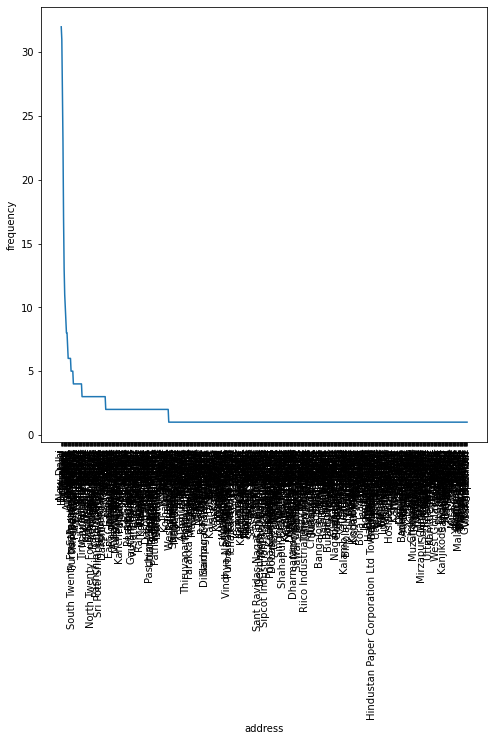

In [24]:
plt.figure(figsize=(8,8))
plt.plot(datami.user_address.value_counts())
plt.xlabel("address")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

In [63]:
temp=pd.DataFrame(datami.groupby(datami.user_address)["user_type"].count())
temp=temp.sort_values(by="user_type",ascending=False)

In [25]:
import numpy as np

In [26]:
for i  in range(90,101,1):
  l=np.percentile(datami["user_address"].value_counts(),i)
  print(str(i)+"th percentile value --->> "+str(l))

90th percentile value --->> 3.0
91th percentile value --->> 3.0
92th percentile value --->> 3.0
93th percentile value --->> 3.0
94th percentile value --->> 3.0
95th percentile value --->> 3.8999999999999773
96th percentile value --->> 4.0
97th percentile value --->> 4.0
98th percentile value --->> 6.0
99th percentile value --->> 9.980000000000018
100th percentile value --->> 32.0


In [27]:
top_adresses=datami["user_address"].value_counts()[(datami["user_address"].value_counts()>3)]


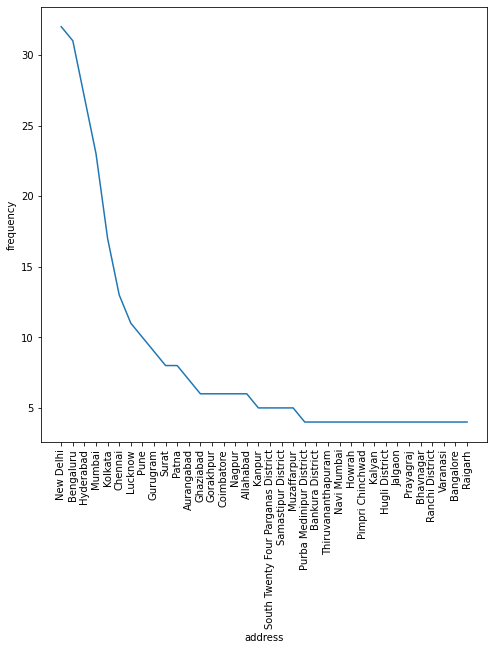

In [28]:
plt.figure(figsize=(8,8))
plt.plot(top_adresses)
plt.xlabel("address")
plt.ylabel("frequency")
plt.xticks(rotation=90,fontsize=10,fontweight="light")
plt.show()

#### The above graph shows the top 5 percentile of districts having highest orders

### REVIEW

In [64]:
totalreview=" ".join(datami["review"])

In [68]:
stopwords=set(STOPWORDS) # getting the stopping words\
# Generating a Wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',stopwords=stopwords,
             
                min_font_size = 10).generate(totalreview) 

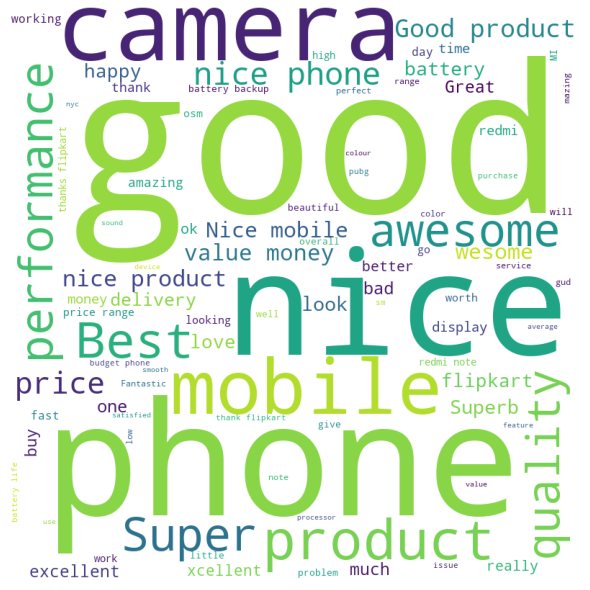

In [69]:
# Plotting the WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 